In [1]:
# Book: Numerical Python

import pymc3 as mc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
c:\users\dasep\appdata\local\programs\python\python37-32\lib\site-packages\xarray\core\merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
# Model definition

mu = 4.0
sigma = 2.0
model = mc.Model()

In [4]:
with model:
    mc.Normal('X', mu, tau=1/sigma**2)

In [5]:
model.vars

[X]

In [6]:
start = dict(X=2)
with model:
    step = mc.Metropolis()
    trace = mc.sample(10000, start=start, step=step)

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [X]
Sampling 2 chains, 0 divergences: 100%|█████████████████████████████████████| 21000/21000 [00:06<00:00, 3134.92draws/s]
The number of effective samples is smaller than 25% for some parameters.


In [7]:
X = trace.get_values("X")

Text(0, 0.5, 'Probability distribution')

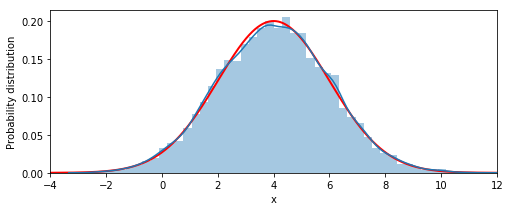

In [8]:
x = np.linspace(-4, 12, 1000)
y = stats.norm(mu, sigma).pdf(x)
fig, ax = plt.subplots(figsize=(8, 3))
ax.plot(x, y, 'r', lw=2)
sns.distplot(X, ax=ax)
ax.set_xlim(-4, 12)
ax.set_xlabel("x")
ax.set_ylabel("Probability distribution")

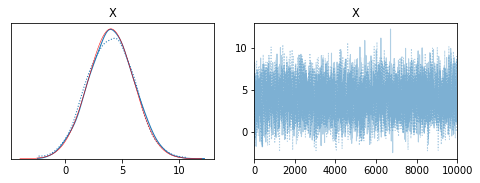

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(8, 2.5), squeeze=False)
mc.traceplot(trace, ax=axes)
axes[0, 0].plot(x, y, 'r', lw=0.5)

In [11]:
model = mc.Model()
with model:
    mean = mc.Normal('mean', 3.0)
    sigma = mc.HalfNormal('sigma', sd=1.0)
    X = mc.Normal('X', mean, sd=sigma)

In [12]:
model.vars

[mean, sigma_log__, X]

In [13]:
with model:
    start = mc.find_MAP()
start

logp = -2.1562, ||grad|| = 1.6366: 100%|███████████████████████████████████████████████| 8/8 [00:00<00:00, 1596.31it/s]


{'mean': array(3.),
 'sigma_log__': array(-674.07720733),
 'X': array(3.),
 'sigma': array(1.78644019e-293)}

In [14]:
with model:
    step = mc.Metropolis()
    trace = mc.sample(100000, start=start, step=step)

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [X]
>Metropolis: [sigma]
>Metropolis: [mean]
Sampling 2 chains, 0 divergences: 100%|███████████████████████████████████| 201000/201000 [01:35<00:00, 2114.36draws/s]
c:\users\dasep\appdata\local\programs\python\python37-32\lib\site-packages\xarray\core\nputils.py:220: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwds)


In [15]:
trace.get_values('sigma').mean()

1.7864401850541627e-293

In [16]:
X = trace.get_values('X')
X.mean()

3.0

In [17]:
trace.get_values('X').std()

0.0

c:\users\dasep\appdata\local\programs\python\python37-32\lib\site-packages\pymc3\plots\__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05320CB0>,
      dtype=object)

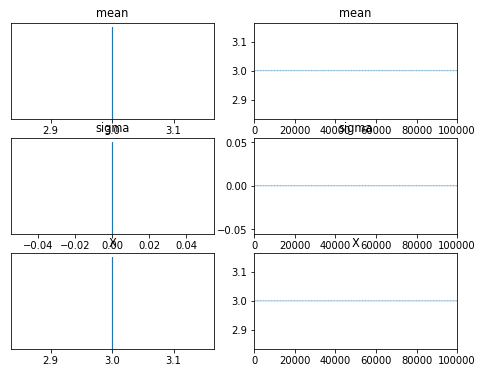

In [18]:
fig, axes = plt.subplots(3, 2, figsize=(8, 6), squeeze=False)
mc.traceplot(trace, varnames=['mean', 'sigma', 'X'], ax=axes)